In [44]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # makes the notebook fill the whole window

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import datetime
import os
import re
import pandas as pd
import shutil
import pycubicspline
import BetterMap
import seaborn as sns
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

from sklearn.preprocessing import MinMaxScaler

from mpl_toolkits.basemap import Basemap

import matplotlib.image as mpimg

from glmtools.io.glm import GLMDataset

import haversine

import BetterMap as BM

import storm_centered_coords as scc

import shapefile as shp

import warnings
warnings.filterwarnings("ignore")

In [41]:
#shp_file = "./ne_10m_coastline/ne_10m_coastline"
#shp_file = "./IPUMSI_world_release2020/world_countries_2020"
shp_file = "./World_Countries__Generalized_-shp/World_Countries__Generalized_"

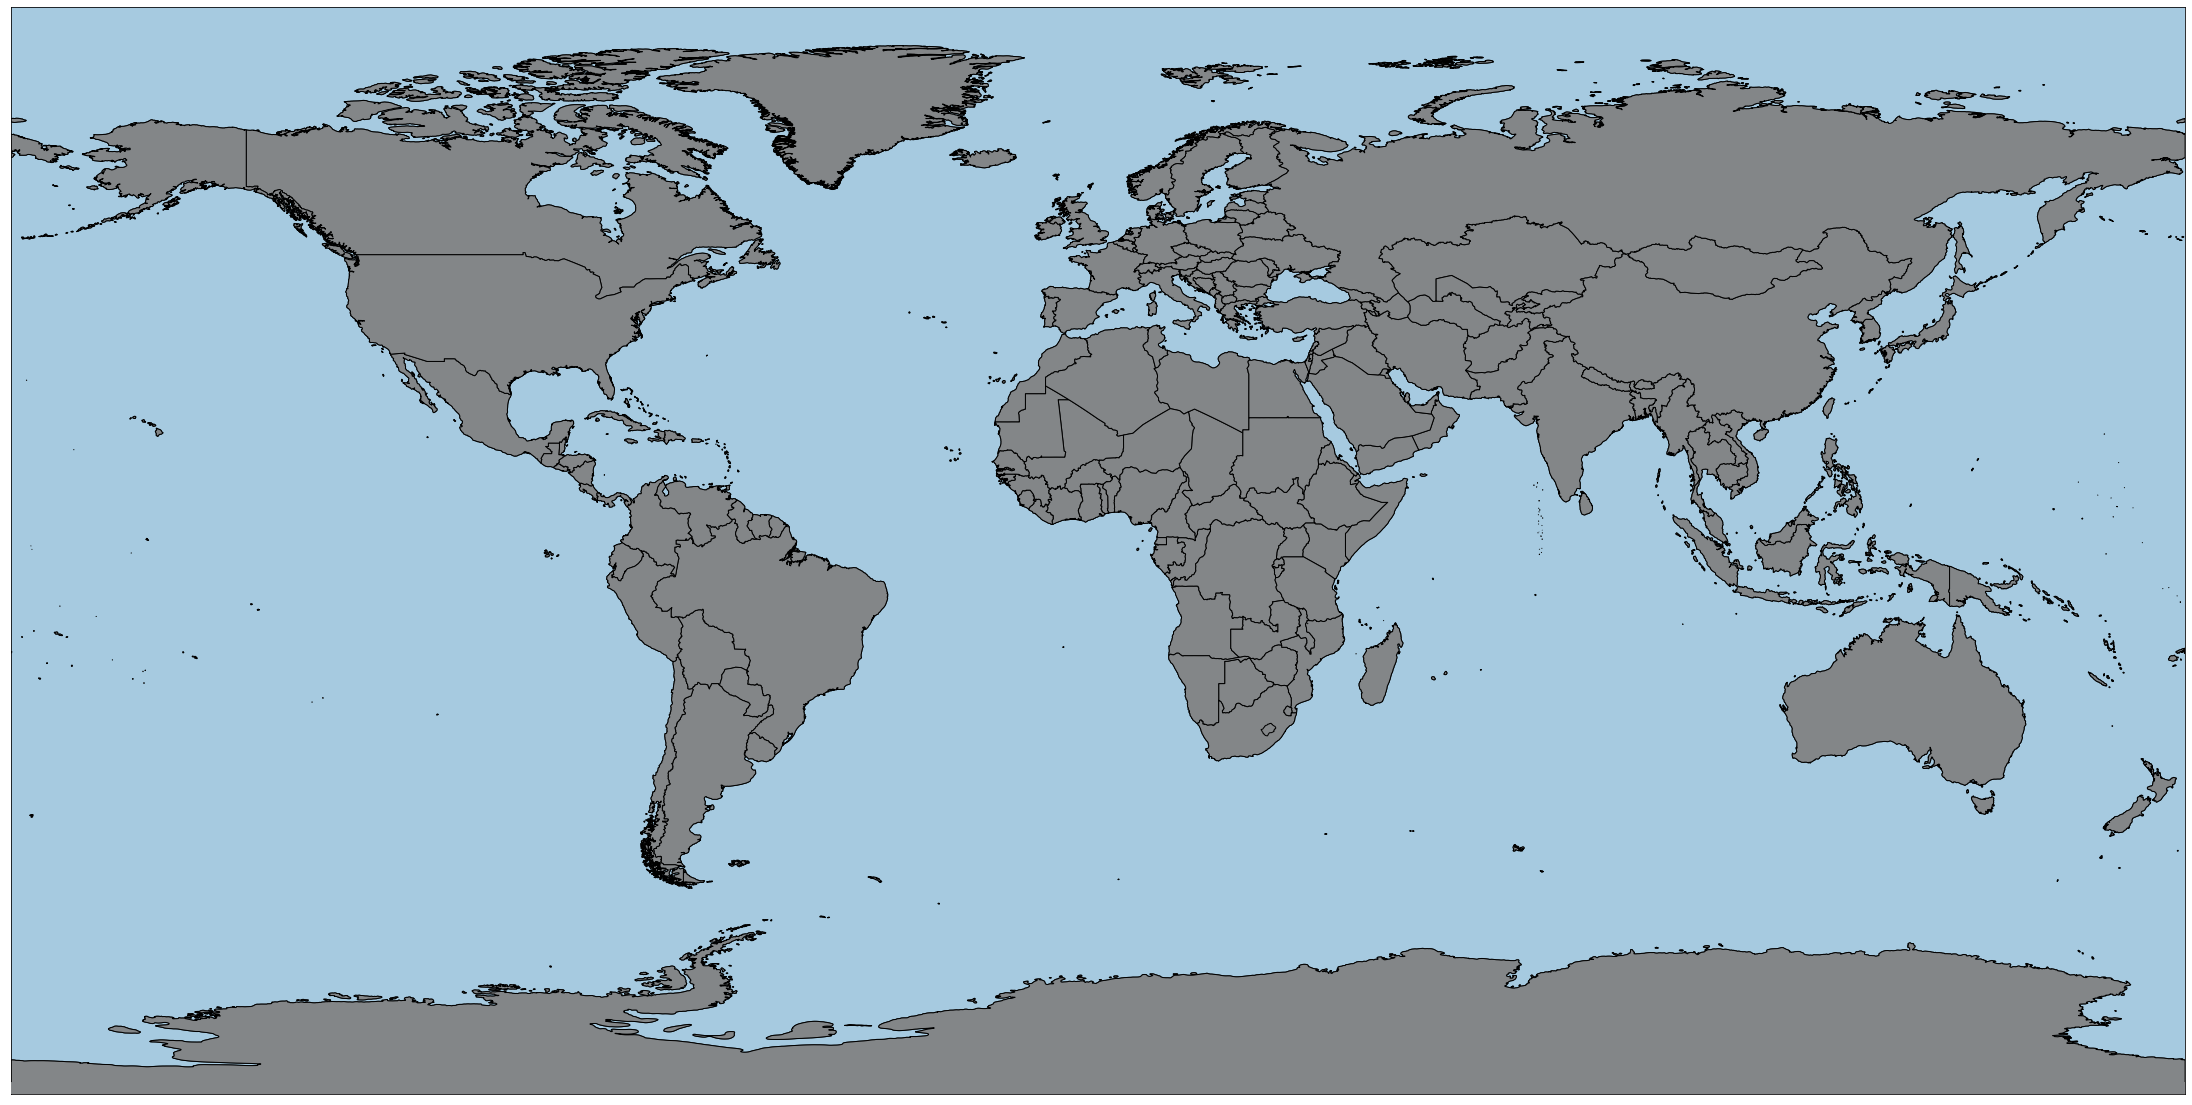

Wall time: 1.23 s


In [62]:
%%time
fig = plt.figure(figsize=(40,20))
ax  = fig.add_subplot(111)

m = Basemap()
m.readshapefile(shp_file, 'world',linewidth=1)

patches = [Polygon(np.array(shape), True) for info, shape in zip(m.world_info, m.world)]
ax.add_collection(PatchCollection(patches, facecolor= '#838688', edgecolor='k', linewidths=1., zorder=2))
ax.add_patch(mpl.patches.Rectangle((-180,-89),360,180,color='#a6cae0'))
ax.add_patch(mpl.patches.Rectangle((-179.9,-89.9),360,2,color='#838688',zorder=3))

plt.show()

In [2]:
def combine_netcdf(files,output):
    combined = []
    for file in files:
        glm = xr.open_dataset(file)
        combined.append(glm.to_dataframe())
    big = pd.concat(combined)
    out = big.to_xarray()
    out.to_netcdf(output)

In [3]:
combine_netcdf(["./Data/Hurricane_Laura/" + str(file) for file in os.listdir('./Data/Hurricane_Laura/')],"Hurricane_Laura.nc")

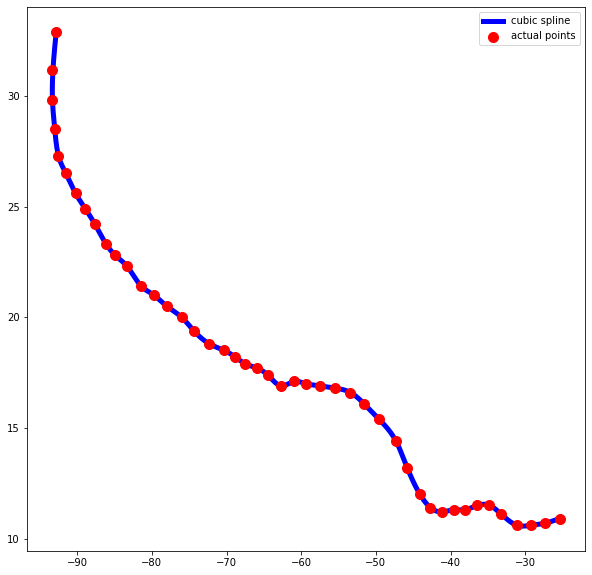

In [5]:
df = scc.cubic_spline_trackfile("./Hurricane_Laura_2020/ATL_20_13_Laura_Reduced_Trackfile.txt")

In [7]:
df.to_csv("Hurricane_Laura_Trackfile_Spline.csv")